<img src="image1.png" alt="Twitter Analytics Picture" title="Twitter Analytics" style="width: 800px;"/>

# Twitter Analytics

In this notebook we are going to analyze tweets obtained from Netlytic. The dataset consists of 2500 tweets containing the hashtags #Nationalday. <br>
First as usual, we must import some libraries.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

df is a dataframe object, here we are reading our dataset into the dataframe df. A dataframe is data structure that represents the data as rows and columns like the spread sheet.

In [2]:
df = pd.read_csv("NationalDay.csv")
df.head()

,id,tweetid,guid,link,author,title,description,pubdate,source,favorite_count,...,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,user_verified,Unnamed: 29
0,1,1442326458295152647,https://twitter.com/metebwalem1/statuses/14423...,https://twitter.com/metebwalem1/statuses/14423...,metebwalem1,"RT @SamChuiPhotos: Wow, I am still speechless....","Wow, I am still speechless. Yesterday I was in...",2021-09-26 23:13:19,Twitter for Android,0,...,478888411,https://pbs.twimg.com/profile_images/136549244...,67850,1281,780,2012-01-30 14:38:51,‏‏‏‏‏مواطن ـ معلم ـ ثملٌ جدا في عشق بلادي ، فا...,بدائع الراشد..حائل ..السعوديه,NaN,NaN
1,2,1442324040899727365,https://twitter.com/MdJawed57632621/statuses/1...,https://twitter.com/MdJawed57632621/statuses/1...,MdJawed57632621,RT @MWLOrg_en: Happy Saudi National Day from t...,Happy Saudi National Day from the Muslim World...,2021-09-26 23:03:43,Twitter for Android,0,...,1418952023374979080,https://pbs.twimg.com/profile_images/141895256...,874,29,10,2021-07-24 11:13:02,NaN,NaN,NaN,NaN
2,3,1442323535024701445,https://twitter.com/Abuferas0100/statuses/1442...,https://twitter.com/Abuferas0100/statuses/1442...,Abuferas0100,RT @emaardubai: From Riyadh to @MyDowntownDuba...,"From Riyadh to @MyDowntownDubai, we are #Toget...",2021-09-26 23:01:42,Twitter for iPhone,0,...,1290314865341616128,https://pbs.twimg.com/profile_images/129031694...,7978,904,178,2020-08-03 11:53:51,حبي الحقيقي هو الوطن,NaN,NaN,NaN
3,4,1442323296188452874,https://twitter.com/MohammadKhanBr6/statuses/1...,https://twitter.com/MohammadKhanBr6/statuses/1...,MohammadKhanBr6,RT @ImranKhanPTI: On behalf of my govt&amp; pe...,On behalf of my govt&amp; people of Pakistan I...,2021-09-26 23:00:45,Twitter for Android,0,...,1441416502922465280,https://pbs.twimg.com/profile_images/144141821...,113,46,1,2021-09-24 10:57:53,NaN,NaN,NaN,NaN
4,5,1442321939406606337,https://twitter.com/SaudiiShield/statuses/1442...,https://twitter.com/SaudiiShield/statuses/1442...,SaudiiShield,RT @___sll1: September 23 | Saudi National Da...,September 23 | Saudi National Day 🇸🇦🤍 #Saudi...,2021-09-26 22:55:22,Twitter for iPhone,0,...,1407013450702888962,https://pbs.twimg.com/profile_images/144089520...,18983,4381,531,2021-06-21 12:32:08,#السعودية_العظمى اولاً 🇸🇦,السعودية العُظمى,NaN,NaN


In [3]:
# to ge the number of rows and columns of our dataframe
df.shape

(2500, 30)

Next, we want to create a simpler dataframe that contain only the columns we need to construct our graph, we call it edge_list. The loc property is used to access a group of rows and columns by label(s) or a boolean array (condition).

In [4]:
edge_list = df.loc[df['tweet_type'] == 'retweet', ['author','retweeted_screen_name','retweet_count']] 
edge_list.head()

,author,retweeted_screen_name,retweet_count
0,metebwalem1,SamChuiPhotos,192
1,MdJawed57632621,MWLOrg_en,69
2,Abuferas0100,emaardubai,746
3,MohammadKhanBr6,ImranKhanPTI,4202
4,SaudiiShield,___sll1,9


In [5]:
edge_list.shape

(1752, 3)

## Constructing a Directed Graph from edge_list dataframe

In [6]:
Di_twitter = nx.from_pandas_edgelist(edge_list, source='author', target='retweeted_screen_name', edge_attr=['retweet_count'], create_using=nx.DiGraph())

In [7]:
# Configure plotting in Jupyter
plt.rcParams.update({
    'figure.figsize': (20, 15),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

Note that we can change the appearance of the node by using the attributes edgecolors, node_color, node_size, arrows, etc. For more about this see https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


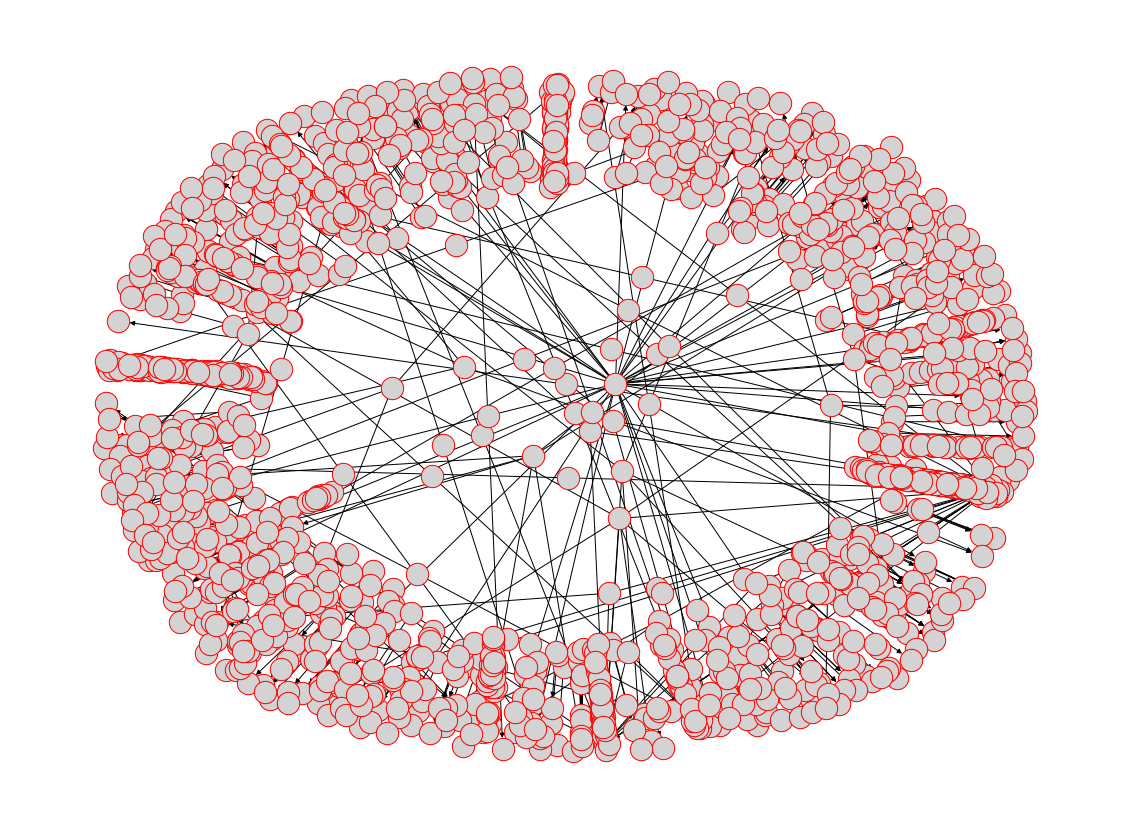

In [8]:
Di_twitter_pos = nx.spring_layout(Di_twitter)
nx.draw_networkx(Di_twitter, Di_twitter_pos, 
                 with_labels=False, 
                 edgecolors='red', 
                 node_color='lightgray', 
                 node_size=500,
                 arrows=True)

## Constructing an undirected Graph from edge_list dataframe

In [9]:
# Now let's read it as an undirected graph
G_twitter = nx.from_pandas_edgelist(edge_list, source='author', target='retweeted_screen_name', edge_attr=['retweet_count'])

### Let's get some basic numbers about the graph...

In [10]:
# get the nuber of nodes
G_twitter.order()

1967

In [11]:
# get the number of edges
G_twitter.size()

1725

In [12]:
# Average clustering coefficient
Average=nx.average_clustering(G_twitter)
Average

0.0016811878758129831

In [15]:
Tran=nx.transitivity(G_twitter)
Tran

0.00021843069679392278

### Plotting the degree distribution

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


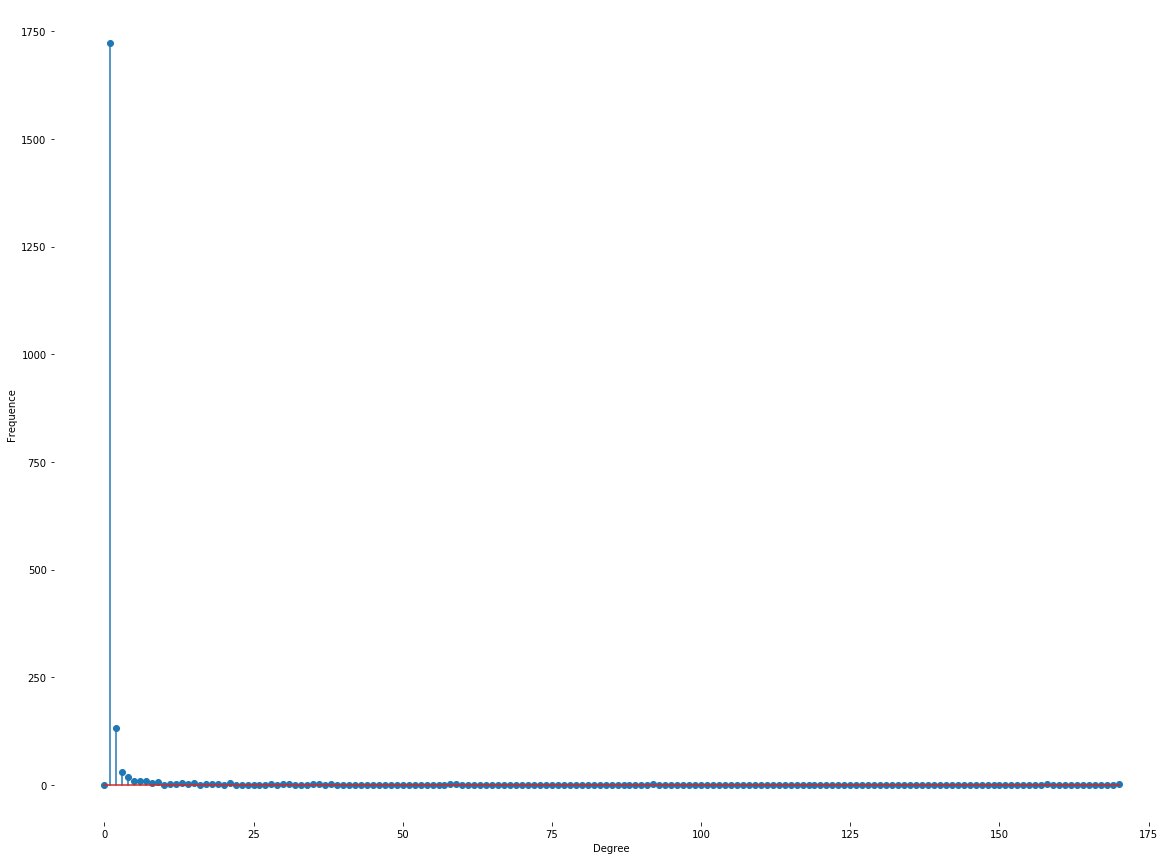

In [13]:
degree_freq = np.array(nx.degree_histogram(G_twitter)).astype('float')
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

Not very helpful, so we need the log scale...

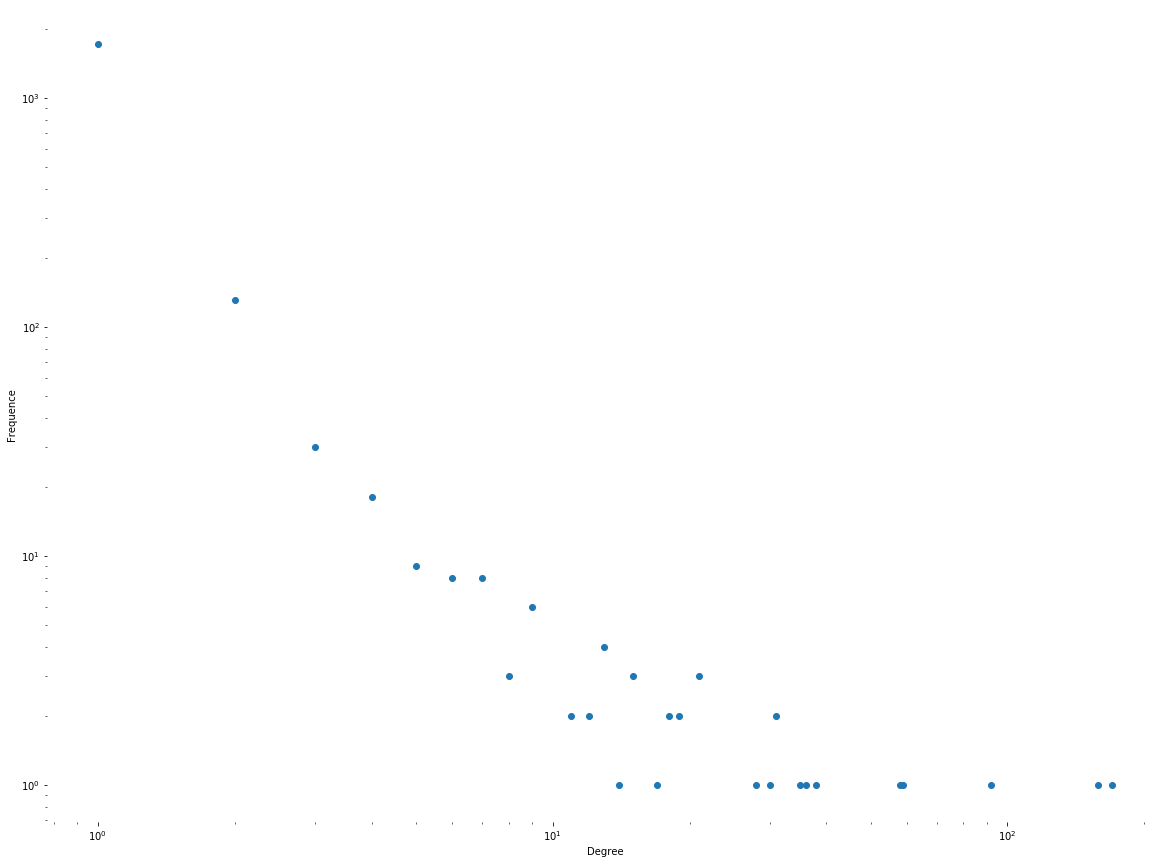

In [14]:
plt.plot(degree_freq, 'o')
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.xscale('log')
plt.yscale('log')
plt.show()

Almost a straight line, looks like a power law distribution... <br>
Let's find the average shortest path to see how far nodes from each other...

In [16]:
Avg=nx.average_shortest_path_length(G_twitter)
print ('Average Distance is:', Avg)

NetworkXError: Graph is not connected.

### Ooops...we got an error!
The graph is not connected, many NetworkX functions will not work with disconnected graphs, so we must find a solution... 

In [17]:
# First, if you don't want to see this error, check for connectivity..
nx.is_connected(G_twitter)

False

In [18]:
# So, how many components do we have?
nx.number_connected_components(G_twitter)

295

In [19]:
# What are their sizes?
# This code get the size of all the components 
# and put them in a list "components" sorted in descending order.

components = [len(c) for c in sorted(nx.connected_components(G_twitter), key=len, reverse=True)]

In [21]:
# let's see the first 10 largest componenets, we only need the largest anyway...
components[:10]

[675, 117, 97, 60, 44, 39, 30, 20, 20, 19]

We can observe that there is 1 giant component with 675 nodes, we need to focus on this one...

In [22]:
# let's get the giant component and put in a graph --> "large_twitter"
large_twitter = max(nx.connected_component_subgraphs(G_twitter), key=len)

In [24]:
large_twitter.order()

675

In [25]:
G_pos = nx.spring_layout(large_twitter)

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


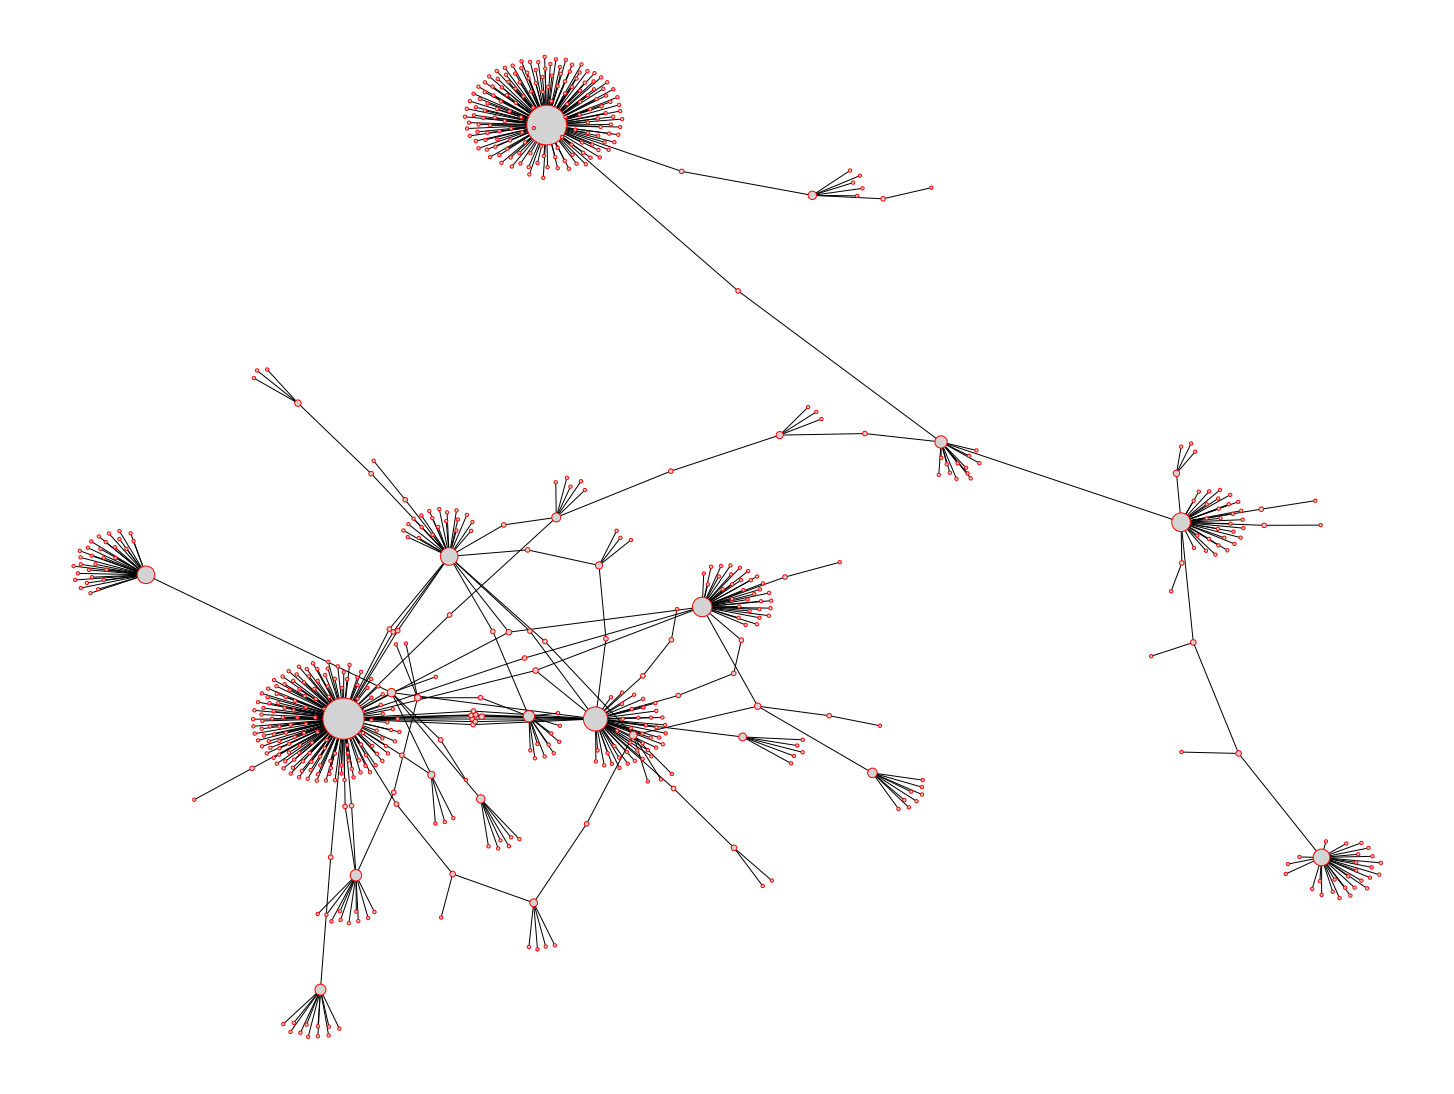

In [26]:
# We want to draw the nodes depending on their degree centrality
list_degree=list(large_twitter.degree()) #this will return a list of tuples each tuple is(node,deg)
nodes , degree = map(list, zip(*list_degree)) #build a node list and corresponding degree list
plt.figure(figsize=(20,15))
nx.draw(large_twitter, 
        G_pos, 
        nodelist=nodes, 
        node_size=[(v * 10)+1 for v in degree],
        edgecolors='red', 
        node_color='lightgray',
        with_labels=False,
        arrowsize=20)
plt.show()

### Obtaining distance measures of the largest component

In [27]:
Avg=nx.average_shortest_path_length(large_twitter)
print ('Average Distance is:', Avg)

Average Distance is: 7.334335641279261


It's a small world... isn't it?

### Eccentricity 
The largest distance between the node and all the other nodes in the network. This calculation is at the node level, which means the eccentricity will be calculated for each node as shown below


In [28]:
EC=nx.eccentricity(large_twitter)
list(EC.items())[:5]

[('AnasGh_', 13),
 ('NajNoorzai', 14),
 ('Silllx11', 13),
 ('VPDKU', 13),
 ('Alenze3__', 17)]

### Diameter 
The largest distance between any two pair of nodes. This calculation is smilier to eccentricity, but the difference is that diameter in the network level. 

In [29]:
Di=nx.diameter(large_twitter)
Di

17

### Periphery 
The sets of nodes with eccentricity equal to the diameter.

In [30]:
Pe=nx.periphery(large_twitter)
Pe

['Alenze3__',
 'FMPublicDiploPK',
 'AAMALHUDAIB',
 '9777kk',
 'MayAlbinali',
 'EEiaser',
 'EmekaAmoke',
 'ufor_ifeanyi',
 'mhmddagani',
 'hussah58463128',
 'MUBARAK95812172',
 'salehmq80',
 'rka2020',
 'hotokenokiyoe',
 'a1ssde']

### Radius 
The smallest eccentricity in the graph.

In [31]:
nx.radius(large_twitter)

9

### Center 
The set of nodes with eccentricity equal to the radius.

In [32]:
Ce=nx.center(large_twitter)
Ce 

['Layal_7', 'nawaf39965848']

##  Centrality measures 
### Betweenness Centrality

In [33]:
Betweenss = nx.betweenness_centrality(large_twitter)
Betsort=sorted(Betweenss.items(), key=lambda x: x[1], reverse=True)[:10]
Betsort

[('reemmohaabdul', 0.675288348160884),
 ('arabnews', 0.5340849467154025),
 ('lapoelkann_', 0.48256747228356817),
 ('Layal_7', 0.47517427171837867),
 ('nawaf39965848', 0.4725243715856632),
 ('KSA2030_news', 0.46888682148667776),
 ('ImranKhanPTI', 0.42979969224121584),
 ('AmiraAbdulgade', 0.39541469035033877),
 ('Ad_Cheema', 0.37181493908757013),
 ('1Handsomejin', 0.19749912919255205)]

### Closeness Centrality

In [34]:
Clos=nx.closeness_centrality(large_twitter)
Clossort=sorted(Clos.items(), key=lambda x: x[1], reverse=True)[:10]
Clossort

[('reemmohaabdul', 0.20662170447578174),
 ('AmiraAbdulgade', 0.19794419970631424),
 ('lapoelkann_', 0.1942923032574229),
 ('nawaf39965848', 0.18577728776185226),
 ('PaoladiProspero', 0.18405243036592026),
 ('ryma080', 0.18196544276457882),
 ('SaudiiShield', 0.18123151384780856),
 ('D7oom_P1', 0.1795418220564731),
 ('1AbuThunayan', 0.17844850410378607),
 ('Layal_7', 0.17788334652942728)]

### Degree Centrality

In [35]:
Deg=nx.degree_centrality(large_twitter)
Degsort=sorted(Deg.items(), key=lambda x: x[1], reverse=True)[:10]
Degsort

[('reemmohaabdul', 0.2522255192878338),
 ('ImranKhanPTI', 0.23442136498516322),
 ('blueabaya', 0.08605341246290801),
 ('HindAlsoliman', 0.05637982195845698),
 ('1Handsomejin', 0.05192878338278932),
 ('PaoladiProspero', 0.04599406528189911),
 ('abdulla_shahid', 0.04599406528189911),
 ('BafGomis', 0.04154302670623146),
 ('arabnews', 0.02225519287833828),
 ('BintMakkah5', 0.019287833827893175)]

### PageRank

In [36]:
pag = nx.pagerank(large_twitter)
sorted(pag.items(), key=lambda x: x[1], reverse=True)[:10]

[('reemmohaabdul', 0.10899971462269141),
 ('ImranKhanPTI', 0.10766346293763115),
 ('blueabaya', 0.034949523236330785),
 ('HindAlsoliman', 0.024563614291607482),
 ('1Handsomejin', 0.02354281707884324),
 ('abdulla_shahid', 0.021299413961260793),
 ('BafGomis', 0.019501421834816738),
 ('PaoladiProspero', 0.01892565149554439),
 ('arabnews', 0.010015927515495564),
 ('BintMakkah5', 0.008606843301019285)]

We notice that this screen name 'reemmohaabdul' is really popular, let's see what was the tweet that made all this fuss..

In [37]:
df.loc[df['retweeted_screen_name'] == 'reemmohaabdul', ['description','retweet_count']].drop_duplicates()

,description,retweet_count
331,Celebrating the Saudi national day https://t.c...,191


## Other Interesting Twitter Analytics
In this section we will perform some simple analytics, such as the top languages, countries, locations, authors and hashtags.

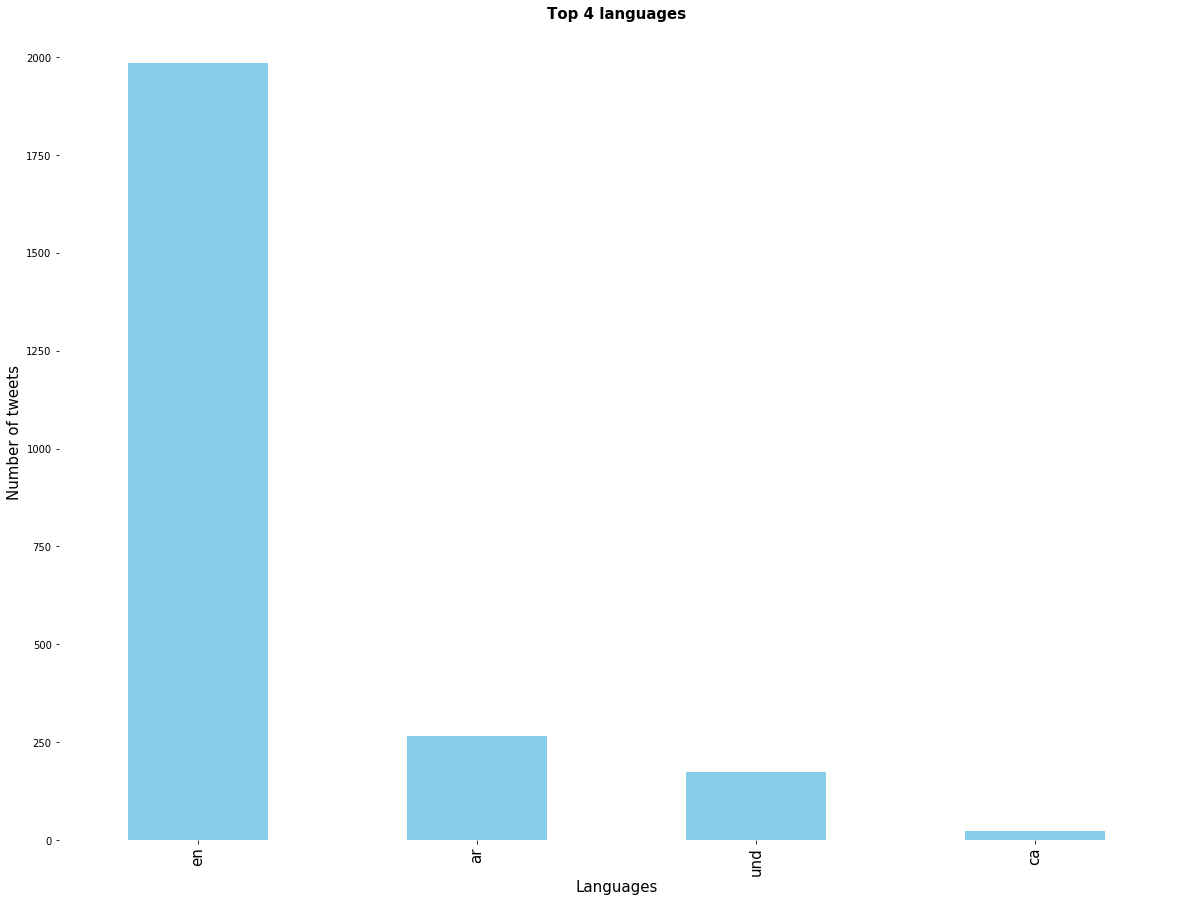

In [40]:
tweets_by_lang = df['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 4 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:4].plot(ax=ax, kind='bar', color='skyblue')

For more color options see https://matplotlib.org/stable/gallery/color/named_colors.html

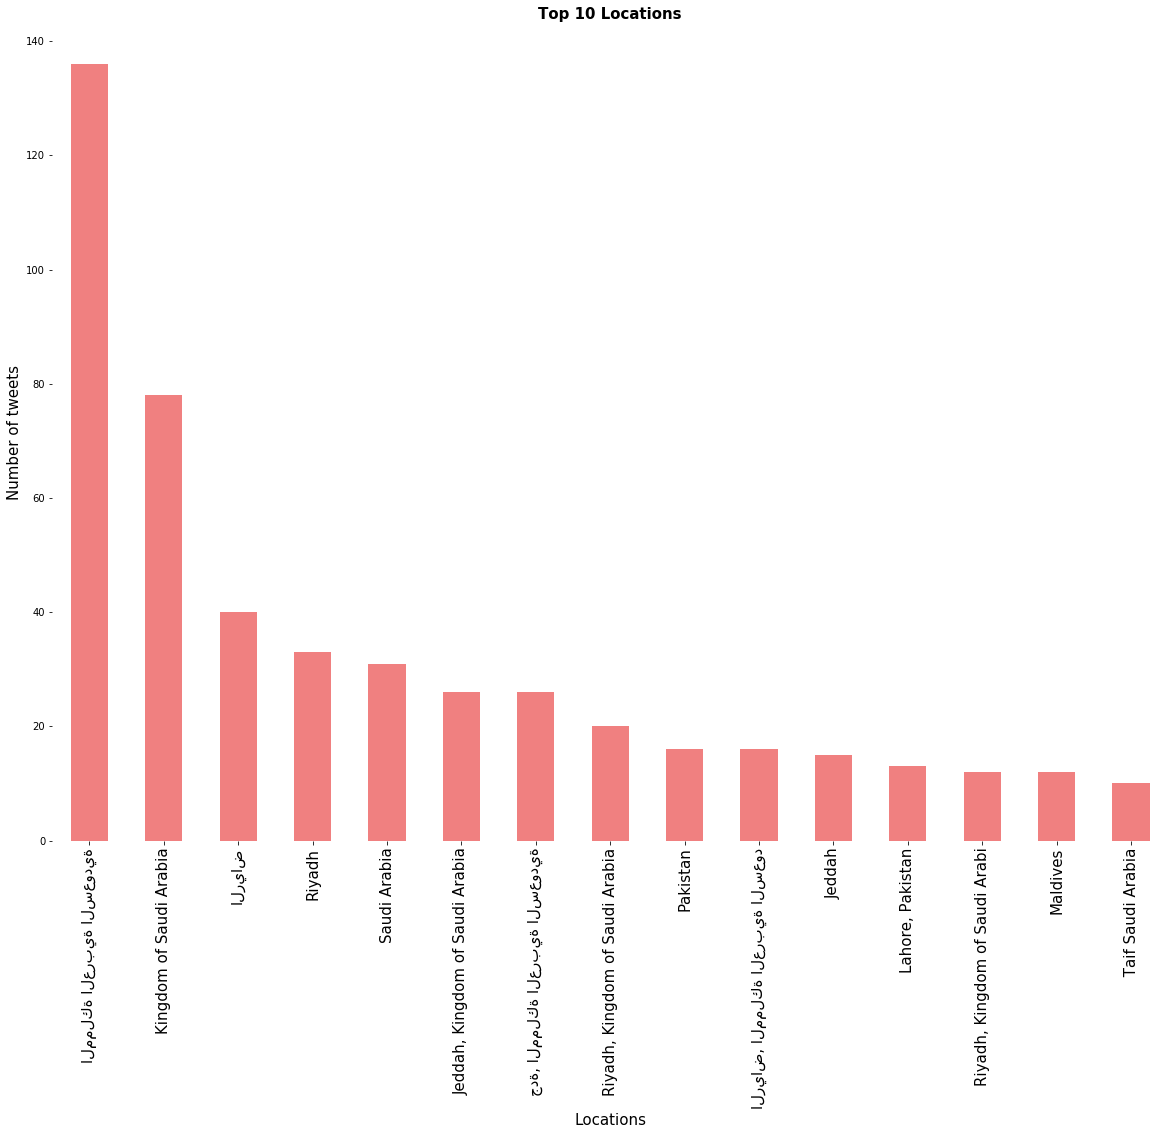

In [41]:
tweets_by_country = df['user_location'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Locations', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Locations', fontsize=15, fontweight='bold')
tweets_by_country[:15].plot(ax=ax, kind='bar', color='lightcoral')

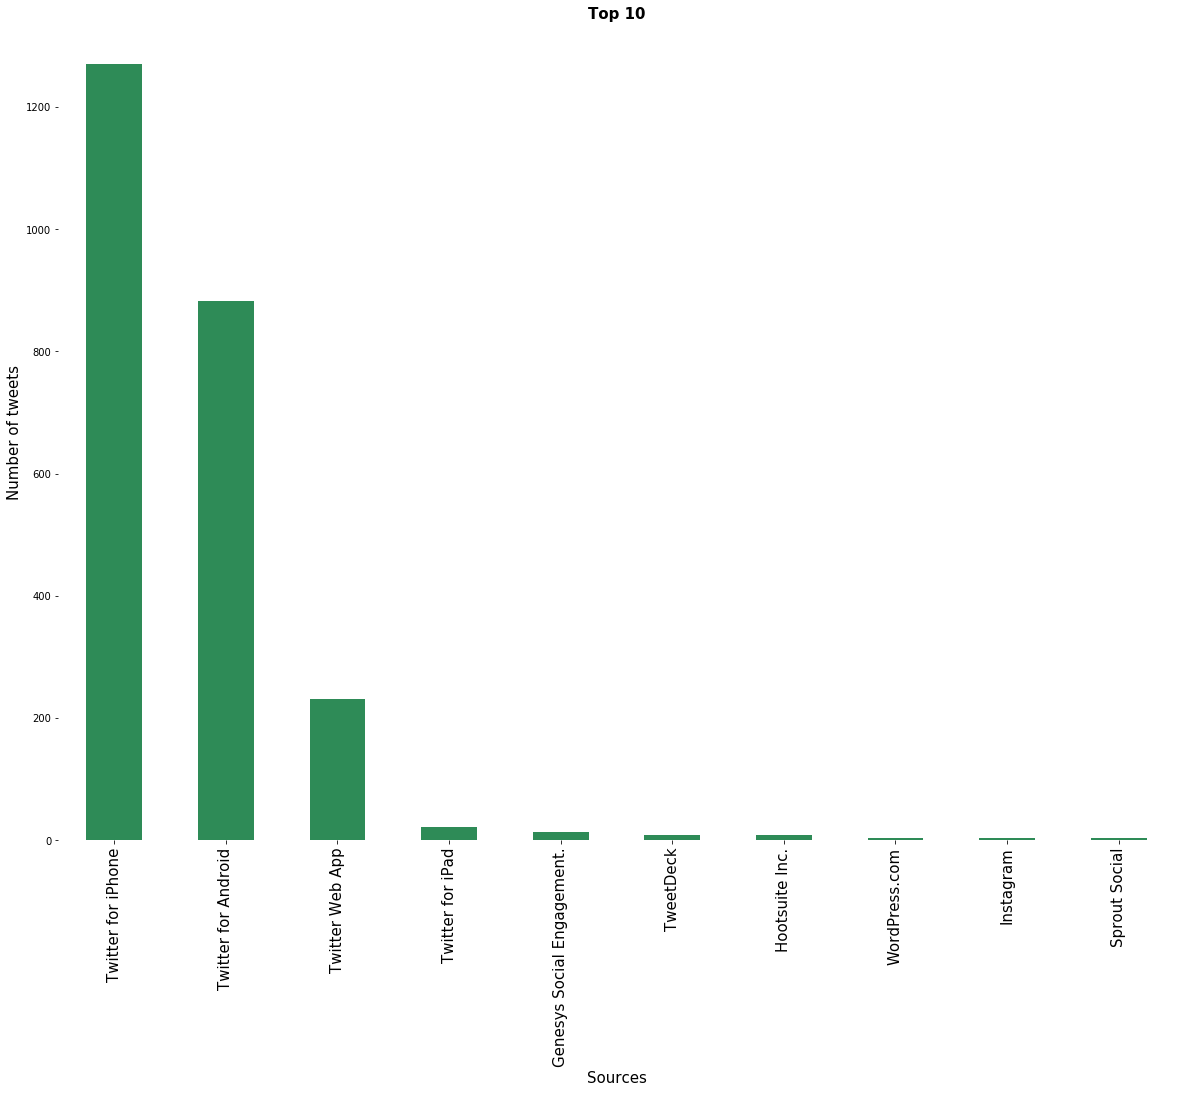

In [42]:
tweets_by_source = df['source'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Sources', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10', fontsize=15, fontweight='bold')
tweets_by_source[:10].plot(ax=ax, kind='bar', color='seagreen')

Now we move to analyze the words that appeared in our dataset. We need to use regular expression for that. A regular expression is a pattern that matches strings or pieces of strings. If you want to learn more about regular expression, see https://cs.lmu.edu/~ray/notes/regex/ and https://docs.python.org/3/library/re.html.

In [43]:
# Importing regular expression library
import re

# Then we create a hashtag dataframe by extracting words starting with '#':
hashtags = df.description.str.extractall(r'(\#\w+)')[0].value_counts()


# And finally we just want to see the top 20 hashtags.
hashtags.head(20)

#SaudiNationalDay           247
#saudinationalday91         236
#SaudiArabia                227
#اليوم_الوطني_السعودي       224
#هي_لنا_دار                 140
#Saudi_National_Day_91      116
#saudiarabia                107
#Saudi                       95
#national                    93
#shabab                      93
#life                        93
#yalla                       93
#day                         93
#football                    93
#Riyadh                      66
#Saudi_National_Day          57
#السعودية                    53
#SaudiNationalDay2021        47
#اليوم_الوطني_91             45
#اليوم_الوطني_السعودي_91     43
Name: 0, dtype: int64

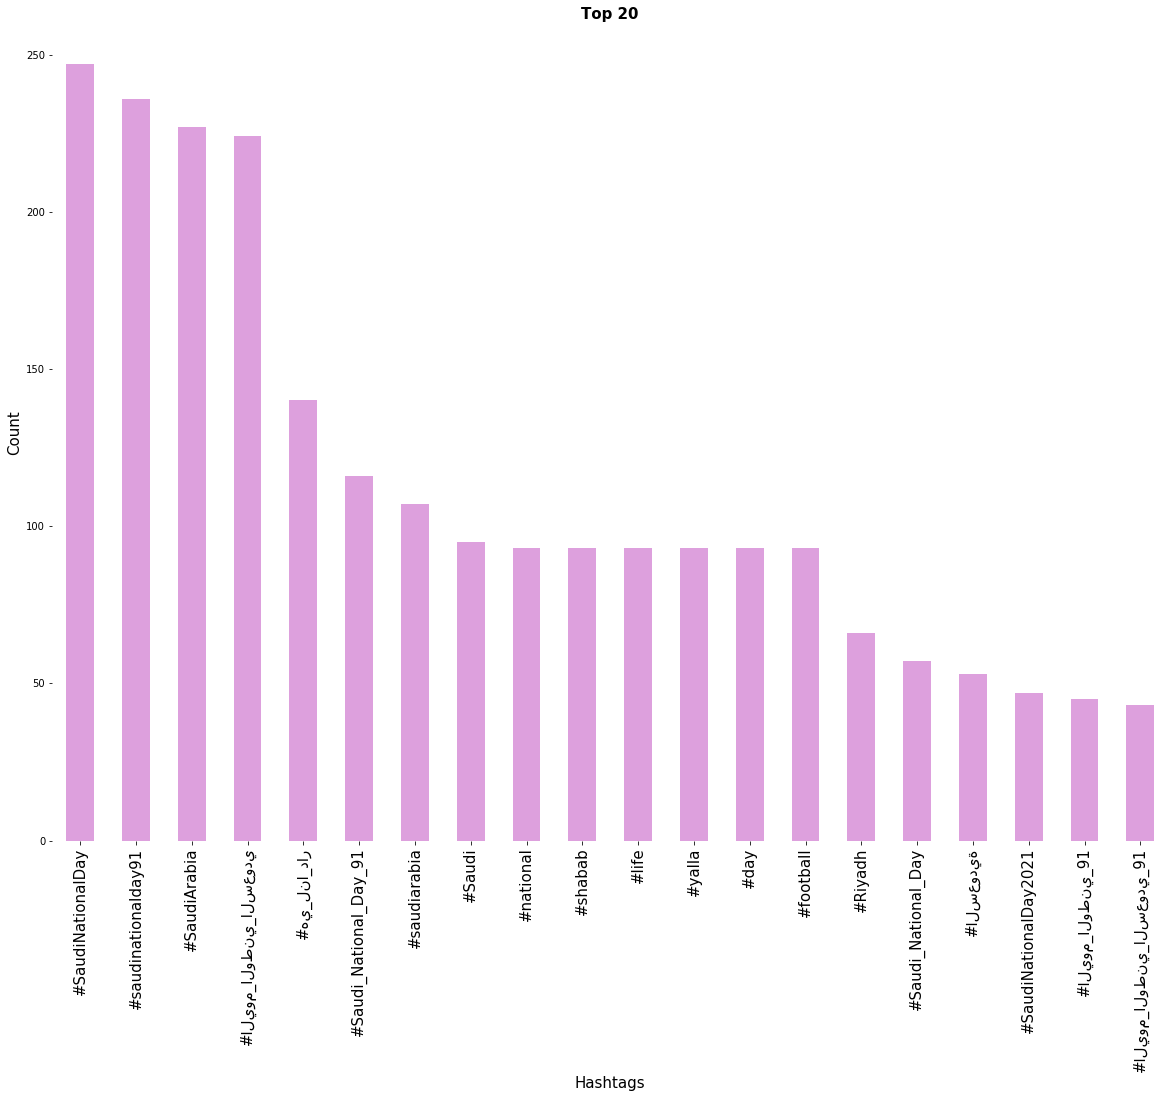

In [45]:
top_hashtags = df.description.str.extractall(r'(\#\w+)')[0].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Hashtags', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Top 20', fontsize=15, fontweight='bold')
top_hashtags[:20].plot(ax=ax, kind='bar', color='plum')

### Who are the users that appeared the most in our dataset? Just the top 10 will do...

In [47]:
df['author'].value_counts().nlargest(10)

1Handsomejin       35
AlRajhiBankCare    13
mr_alobaikan       10
Rahf2Rahf           7
SaudiiShield        7
wbkyoot             7
kms200916           6
hamad2095           6
Diiivvi             5
nono67r             5
Name: author, dtype: int64

### Retweets Count 
Here we will add a column that will take a boolean value, whether the tweet is retweet (true), or not a retweet (false).

In [48]:
df['is_retweet'] = df['title'].apply(lambda tweet: tweet.startswith('RT '))

In [49]:
df.head(3)

,id,tweetid,guid,link,author,title,description,pubdate,source,favorite_count,...,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,user_verified,Unnamed: 29,is_retweet
0,1,1442326458295152647,https://twitter.com/metebwalem1/statuses/14423...,https://twitter.com/metebwalem1/statuses/14423...,metebwalem1,"RT @SamChuiPhotos: Wow, I am still speechless....","Wow, I am still speechless. Yesterday I was in...",2021-09-26 23:13:19,Twitter for Android,0,...,https://pbs.twimg.com/profile_images/136549244...,67850,1281,780,2012-01-30 14:38:51,‏‏‏‏‏مواطن ـ معلم ـ ثملٌ جدا في عشق بلادي ، فا...,بدائع الراشد..حائل ..السعوديه,NaN,NaN,True
1,2,1442324040899727365,https://twitter.com/MdJawed57632621/statuses/1...,https://twitter.com/MdJawed57632621/statuses/1...,MdJawed57632621,RT @MWLOrg_en: Happy Saudi National Day from t...,Happy Saudi National Day from the Muslim World...,2021-09-26 23:03:43,Twitter for Android,0,...,https://pbs.twimg.com/profile_images/141895256...,874,29,10,2021-07-24 11:13:02,NaN,NaN,NaN,NaN,True
2,3,1442323535024701445,https://twitter.com/Abuferas0100/statuses/1442...,https://twitter.com/Abuferas0100/statuses/1442...,Abuferas0100,RT @emaardubai: From Riyadh to @MyDowntownDuba...,"From Riyadh to @MyDowntownDubai, we are #Toget...",2021-09-26 23:01:42,Twitter for iPhone,0,...,https://pbs.twimg.com/profile_images/129031694...,7978,904,178,2020-08-03 11:53:51,حبي الحقيقي هو الوطن,NaN,NaN,NaN,True


In [50]:
df.is_retweet.value_counts()

True     1839
False     661
Name: is_retweet, dtype: int64

## Creating a Word Cloud

Please download wordcloud package. In the terminal type:
conda install -c conda-forge wordcloud

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [52]:
pd.options.display.max_rows = 1000
all_hashtags = df.description.str.extractall(r'(\#\w+)')
all_hashtags.values

array([['#Kingdom'],
       ['#SaudiNationalDay'],
       ['#TogetherForever'],
       ...,
       ['#هي_لنا_دار'],
       ['#اليوم_الوطني_السعودي'],
       ['#saudinationalday91']], dtype=object)

(-0.5, 399.5, 199.5, -0.5)

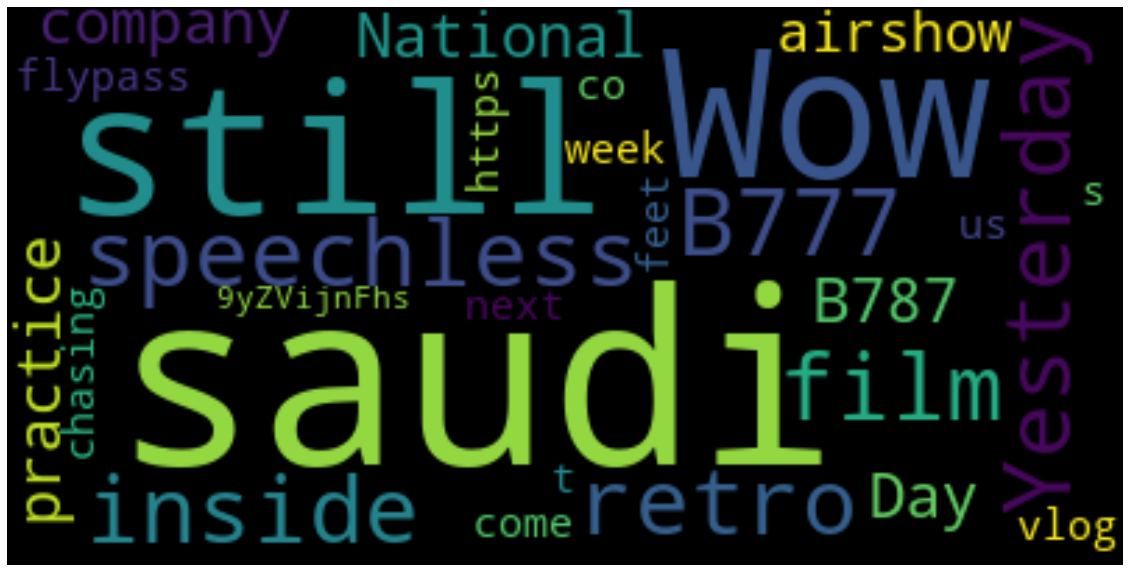

In [53]:
# Start with one tweet:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


For more about color maps see:
    https://matplotlib.org/examples/color/colormaps_reference.html

### Your turn 
Get a dataset from Netlytic, construct an undirected graph, and perform some analysis...have fun! But let's keep it simple, just draw the graph, get two centrality measures and get the top 10 hashtags..

References:
1. http://adilmoujahid.com/posts/2014/07/twitter-analytics/
2. https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
3. https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-8-dimensionality-reduction-chi2-pca-c6d06fb3fcf3
4. https://www.datacamp.com/community/tutorials/wordcloud-python
5. https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html